In [25]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from statsmodels.tsa.arima_model import ARIMA
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                                FutureWarning)
    warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                                FutureWarning)

In [3]:
nfl_ma = pd.read_csv('./data/nfl_fin.csv')

In [4]:
nfl_ma.head()

,id,schedule_date,schedule_season,schedule_week,target_team,score,opponent_score,opponent_team,win_margin,passing_yards,rushing_yards,opp_passing_yards,opp_rushing_yards,home_team,team_favorite_id,spread_favorite,over_under_line,game_number,home_yes
0,MIN2010-09-09,2010-09-09,2010,1,MIN,9.0,14.0,NO,-5.0,171,91,237,79,NO,NO,-5.0,49.5,1,0
1,NO2010-09-09,2010-09-09,2010,1,NO,14.0,9.0,MIN,5.0,237,79,171,91,NO,NO,-5.0,49.5,1,1
2,ARI2010-09-12,2010-09-12,2010,1,ARI,17.0,13.0,LAR,4.0,297,112,253,85,LAR,ARI,-3.0,39.5,1,0
3,ATL2010-09-12,2010-09-12,2010,1,ATL,9.0,15.0,PIT,-6.0,252,58,236,143,PIT,ATL,-1.5,39.5,1,0
4,BUF2010-09-12,2010-09-12,2010,1,BUF,10.0,15.0,MIA,-5.0,139,50,182,132,BUF,MIA,-3.0,39.0,1,1


In [7]:
nfl_ma['target_team'].unique()

array(['MIN', 'NO', 'ARI', 'ATL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE',
       'DAL', 'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAX', 'LAR', 'MIA', 'NE',
       'NYG', 'OAK', 'PHI', 'PIT', 'SEA', 'SF', 'TB', 'TEN', 'WAS', 'BAL',
       'KC', 'LAC', 'NYJ'], dtype=object)

In [13]:
team = pd.DataFrame(nfl_ma[nfl_ma['target_team'] == 'NYJ'])
team['pf_5mva'] = team.iloc[:,5].rolling(window=5).mean().shift()
team['pa_5mva'] = team.iloc[:,6].rolling(window=5).mean().shift()
team['margin_5mva'] = team.iloc[:,8].rolling(window=5).mean().shift()
team['pyards_5mva'] = team.iloc[:,9].rolling(window=5).mean().shift()
team['ryards_5mva'] = team.iloc[:,10].rolling(window=5).mean().shift()
team['opp_pyards_5mva'] = team.iloc[:,11].rolling(window=5).mean().shift()
team['opp_ryards_5mva'] = team.iloc[:,12].rolling(window=5).mean().shift()
team.dropna(inplace=True)

In [26]:
team.set_index('schedule_date', inplace=True)

In [47]:
team.head(32)

,id,schedule_season,schedule_week,target_team,score,opponent_score,opponent_team,win_margin,passing_yards,rushing_yards,opp_passing_yards,opp_rushing_yards,home_team,team_favorite_id,spread_favorite,over_under_line,game_number,home_yes,pf_5mva,pa_5mva,margin_5mva,pyards_5mva,ryards_5mva,opp_pyards_5mva,opp_ryards_5mva
schedule_date,,,,,,,,,,,,,,,,,,,,,,,,,
2010-10-17,NYJ2010-10-17,2010,6,NYJ,24.0,20.0,DEN,4.0,198,129,209,145,DEN,NYJ,-3.5,43.0,6,0,27.0,16.2,10.8,182.4,165.2,250.2,79.0
2010-10-31,NYJ2010-10-31,2010,8,NYJ,0.0,9.0,GB,-9.0,256,119,170,81,NYJ,NYJ,-6.0,42.0,7,1,30.0,18.2,11.8,207.2,167.8,242.4,98.2
2010-11-07,NYJ2010-11-07,2010,9,NYJ,23.0,20.0,DET,3.0,336,110,240,78,DET,NYJ,-5.5,42.0,8,0,24.4,17.2,7.2,214.4,164.4,226.8,104.0
2010-11-14,NYJ2010-11-14,2010,10,NYJ,26.0,20.0,CLE,6.0,299,172,205,107,CLE,NYJ,-3.5,37.0,9,0,22.8,16.6,6.2,230.4,157.2,202.2,102.8
2010-11-21,NYJ2010-11-21,2010,11,NYJ,30.0,27.0,HOU,3.0,315,103,254,97,NYJ,NYJ,-6.5,46.0,10,1,20.4,17.8,2.6,256.0,137.0,217.6,101.4
2010-11-25,NYJ2010-11-25,2010,12,NYJ,26.0,10.0,CIN,16.0,166,170,135,46,NYJ,NYJ,-9.5,43.5,11,1,20.6,19.2,1.4,280.8,126.6,215.6,101.6
2010-12-06,NYJ2010-12-06,2010,13,NYJ,3.0,45.0,NE,-42.0,164,152,326,101,NE,NE,-4.0,44.5,12,0,21.0,17.2,3.8,274.4,134.8,200.8,81.8
2010-12-12,NYJ2010-12-12,2010,14,NYJ,6.0,10.0,MIA,-4.0,216,87,55,101,NYJ,NYJ,-5.5,38.0,13,1,21.6,24.4,-2.8,256.0,141.4,232.0,85.8
2010-12-19,NYJ2010-12-19,2010,15,NYJ,22.0,17.0,PIT,5.0,170,106,264,146,PIT,PIT,-4.0,35.5,14,0,18.2,22.4,-4.2,232.0,136.8,195.0,90.4


/Users/gnissAir/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='schedule_date'>

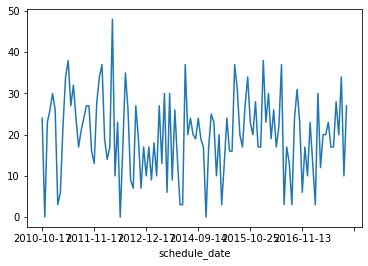

In [28]:
team['score'].plot()

In [30]:
arima = ARIMA(team['score'], order = [1, 1, 1])
model = arima.fit()

/Users/gnissAir/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/gnissAir/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but 

In [31]:
preds = model.predict()

In [42]:
model.forecast()

(array([19.19720377]),
 array([9.72730877]),
 array([[ 0.13202892, 38.26237862]]))

In [32]:
preds

schedule_date
2010-10-31    -0.014489
2010-11-07    11.697115
2010-11-14    -7.069557
2010-11-21    -7.525845
2010-11-25    -9.162977
                ...    
2017-10-22     1.898399
2017-10-29    -8.778068
2017-11-02    -0.973002
2017-11-12   -14.529919
2017-11-26     8.812382
Length: 117, dtype: float64

In [43]:
arima2 = ARIMA(team['score'][:-1], order = [1, 1, 1])
model2 = arima2.fit()

/Users/gnissAir/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/gnissAir/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but 

In [44]:
model2.forecast()

(array([18.61727413]),
 array([9.73941486]),
 array([[-0.47162823, 37.70617649]]))

In [45]:
team['score'][-1]

27.0

In [51]:
team.columns

Index(['id', 'schedule_season', 'schedule_week', 'target_team', 'score',
       'opponent_score', 'opponent_team', 'win_margin', 'passing_yards',
       'rushing_yards', 'opp_passing_yards', 'opp_rushing_yards', 'home_team',
       'team_favorite_id', 'spread_favorite', 'over_under_line', 'game_number',
       'home_yes', 'pf_5mva', 'pa_5mva', 'margin_5mva', 'pyards_5mva',
       'ryards_5mva', 'opp_pyards_5mva', 'opp_ryards_5mva'],
      dtype='object')

In [52]:
arima1 = ARIMA(team['score'], exog = team[['pa_5mva', 'opp_pyards_5mva', 'opp_ryards_5mva']], order = [1, 1, 1])
model1 = arima.fit()

/Users/gnissAir/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/gnissAir/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/gnissAir/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace fra

In [53]:
preds1 = model1.predict()

In [54]:
preds1

schedule_date
2010-10-31    -0.014489
2010-11-07    11.697115
2010-11-14    -7.069557
2010-11-21    -7.525845
2010-11-25    -9.162977
                ...    
2017-10-22     1.898399
2017-10-29    -8.778068
2017-11-02    -0.973002
2017-11-12   -14.529919
2017-11-26     8.812382
Length: 117, dtype: float64

In [33]:
team.columns


Index(['id', 'schedule_season', 'schedule_week', 'target_team', 'score',
       'opponent_score', 'opponent_team', 'win_margin', 'passing_yards',
       'rushing_yards', 'opp_passing_yards', 'opp_rushing_yards', 'home_team',
       'team_favorite_id', 'spread_favorite', 'over_under_line', 'game_number',
       'home_yes', 'pf_5mva', 'pa_5mva', 'margin_5mva', 'pyards_5mva',
       'ryards_5mva', 'opp_pyards_5mva', 'opp_ryards_5mva'],
      dtype='object')